In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import seaborn as sns
import string
import ast

In [2]:
# immporting user-genre normalized matrix
filepath = "./Datasets/"
user_genre_mat_norm = pd.read_csv(filepath + "user_genre_mat_norm.csv", sep = "|", encoding = "utf-8")
user_genre_mat_norm

,Unnamed: 0,user_id,Action,Free to Play,Casual,Adventure,Racing,Strategy,Indie,RPG,...,Utilities,Education,Design &amp; Illustration,Audio Production,Video Production,Software Training,Accounting,Web Publishing,Photo Editing,Early Access
0,0,76561197970982479,0.875454,0.021201,0.019359,0.130079,0.000028,0.296529,0.135857,0.278697,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003327
1,1,js41637,0.616869,0.011124,0.178929,0.488595,0.019498,0.211368,0.495655,0.190487,...,0.001875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027058
2,2,evcentric,0.499497,0.073024,0.278787,0.109159,0.000000,0.351162,0.544365,0.370045,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028308
3,3,Riot-Punch,0.963891,0.000817,0.022721,0.204799,0.025453,0.042175,0.092651,0.124504,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000059
4,4,doctr,0.885247,0.052226,0.016659,0.293672,0.007828,0.144582,0.114237,0.299803,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8117,8117,76561198075584298,0.887761,0.018710,0.012119,0.373480,0.001389,0.002288,0.167737,0.003922,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.141701
8118,8118,coollord,0.694275,0.193049,0.053191,0.312632,0.000000,0.157296,0.358200,0.321104,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045075
8119,8119,zombiehackerbrah,0.816561,0.080313,0.034943,0.364530,0.055062,0.135251,0.303367,0.213205,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071940
8120,8120,76561198048017700,0.438186,0.362320,0.361897,0.173394,0.000000,0.176986,0.258558,0.535291,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [3]:
# get list of genres (features)
features = list(user_genre_mat_norm.columns)[2:]
# y(x) --> user_id as a normalized vector of genre's components
x = user_genre_mat_norm.loc[:, features].values
y = user_genre_mat_norm.loc[:, ['user_id']].values


In [10]:
user_id_to_recommend = 'evcentric'
user_index = user_genre_mat_norm.index[user_genre_mat_norm['user_id'] == user_id_to_recommend].tolist()
user_to_rec_features = x[user_index]

distance_to_user = euclidean_distances(x, user_to_rec_features)
distance_to_user
final_df = pd.DataFrame(y, columns = ['user_id'])
final_df['distance_to_curr_user'] = distance_to_user

In [11]:
final_df

,user_id,distance_to_curr_user
0,76561197970982479,0.646877
1,js41637,0.505714
2,evcentric,0.000000
3,Riot-Punch,0.855351
4,doctr,0.746685
...,...,...
8117,76561198075584298,0.855171
8118,coollord,0.515728
8119,zombiehackerbrah,0.621037
8120,76561198048017700,0.654115


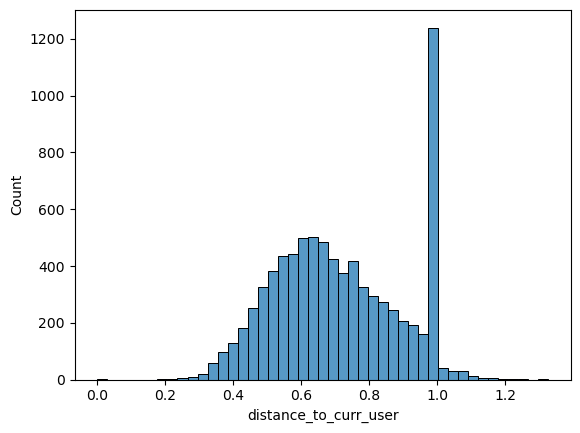

In [12]:
# histogram of users separation to the current user, closest to 0 means more simmilarity
sns.histplot(data = final_df, x = "distance_to_curr_user")
plt.show()

In [18]:
# obtaining a list of the top 5 closest users to the current one
user_simm_top5 = final_df.sort_values('distance_to_curr_user').head(6)
user_simm_top5 = user_simm_top5.iloc[1:, :]
# and choosing the closest one of all
most_simm_user = user_simm_top5.iloc[0,0]
most_simm_user

'rtsj'

In [15]:
user_item_genre = pd.read_csv(filepath + "user_item_genre.csv", sep = "|", encoding = "utf-8")
user_item_genre

,Unnamed: 0,index,user_id,items_count,items_item_id,items_item_name,items_playtime_forever,items_playtime_2weeks,Action,Free to Play,...,Utilities,Education,Design &amp; Illustration,Audio Production,Video Production,Software Training,Accounting,Web Publishing,Photo Editing,Early Access
0,0,0,76561197970982479,277,10.0,Counter-Strike,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,76561197970982479,277,20.0,Team Fortress Classic,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,76561197970982479,277,30.0,Day of Defeat,7,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,76561197970982479,277,40.0,Deathmatch Classic,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,76561197970982479,277,50.0,Half-Life: Opposing Force,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802338,802338,8199,76561198073904081,160,418070.0,Turbo Pug,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
802339,802339,8199,76561198073904081,160,368500.0,Assassin's Creed Syndicate,291,0,1,0,...,0,0,0,0,0,0,0,0,0,0
802340,802340,8199,76561198073904081,160,434570.0,Blood and Bacon,46,0,1,0,...,0,0,0,0,0,0,0,0,0,0
802341,802341,8199,76561198073904081,160,442080.0,Riders of Icarus,118,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
condition = user_item_genre['user_id'] == user_id_to_recommend
user_to_recommend = user_item_genre.loc[condition, :]
user_owned_games = list(user_to_recommend['items_item_id'])

condition = user_item_genre['user_id'] == most_simm_user
simm_user = user_item_genre.loc[condition, :]
simm_user.head(15)

,Unnamed: 0,index,user_id,items_count,items_item_id,items_item_name,items_playtime_forever,items_playtime_2weeks,Action,Free to Play,...,Utilities,Education,Design &amp; Illustration,Audio Production,Video Production,Software Training,Accounting,Web Publishing,Photo Editing,Early Access
222530,222530,2369,rtsj,32,550.0,Left 4 Dead 2,612,0,1,0,...,0,0,0,0,0,0,0,0,0,0
222531,222531,2369,rtsj,32,550.0,Left 4 Dead 2 Beta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222532,222532,2369,rtsj,32,42910.0,Magicka,46,0,1,0,...,0,0,0,0,0,0,0,0,0,0
222533,222533,2369,rtsj,32,24240.0,PAYDAY: The Heist,98,0,1,0,...,0,0,0,0,0,0,0,0,0,0
222534,222534,2369,rtsj,32,113200.0,The Binding of Isaac,153,0,1,0,...,0,0,0,0,0,0,0,0,0,0
222535,222535,2369,rtsj,32,201790.0,Orcs Must Die! 2,1688,0,1,0,...,0,0,0,0,0,0,0,0,0,0
222536,222536,2369,rtsj,32,730.0,Counter-Strike: Global Offensive,968,0,1,0,...,0,0,0,0,0,0,0,0,0,0
222537,222537,2369,rtsj,32,208580.0,STAR WARS™ Knights of the Old Republic™ II: Th...,368,368,0,0,...,0,0,0,0,0,0,0,0,0,0
222538,222538,2369,rtsj,32,204300.0,Awesomenauts,67,0,1,1,...,0,0,0,0,0,0,0,0,0,0
222539,222539,2369,rtsj,32,212680.0,FTL: Faster Than Light,2417,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
games_simm_user = simm_user[['items_item_id', 'items_item_name', 'items_playtime_forever']]
games_simm_user.sort_values('items_playtime_forever', ascending = False)

,items_item_id,items_item_name,items_playtime_forever
222540,204360.0,Castle Crashers,2669
222539,212680.0,FTL: Faster Than Light,2417
222535,201790.0,Orcs Must Die! 2,1688
222548,218620.0,PAYDAY 2,1679
222550,281990.0,Stellaris,1074
222536,730.0,Counter-Strike: Global Offensive,968
222546,208090.0,Loadout,644
222530,550.0,Left 4 Dead 2,612
222544,230410.0,Warframe,580
222555,7670.0,BioShock,410


In [23]:
simm_user_games_list = list(games_simm_user.sort_values('items_playtime_forever', ascending = False)['items_item_id'])

[204360.0,
 212680.0,
 201790.0,
 218620.0,
 281990.0,
 730.0,
 208090.0,
 550.0,
 230410.0,
 7670.0,
 208580.0,
 219740.0,
 8870.0,
 255420.0,
 113200.0,
 252950.0,
 228960.0,
 24240.0,
 227280.0,
 204300.0,
 434650.0,
 418340.0,
 42910.0,
 218470.0,
 550.0,
 322330.0,
 351490.0,
 368730.0,
 8850.0,
 205790.0,
 409710.0,
 409720.0]

In [67]:
game_recommended = -1
for i in range(len(simm_user_games_list)):
    if simm_user_games_list[i] not in user_owned_games:
        game_recommended = simm_user_games_list[i]
        break

print(game_recommended)

204360.0


In [66]:
user_simm_top5

,user_id,distance_to_curr_user
2348,rtsj,0.200877
13,cadmusthreepointoh,0.207400
5384,76561198041284313,0.212185
1325,76561198021814659,0.243158
1907,FW2912,0.249389
